### Check the ventricle segmentation is working correctly.

In [63]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import proplot as pplt
import os
import nibabel as nib

In [64]:
folder = "/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/imgs/"
t1 = folder + "MSS3_ED_004_V1_T1.nii.gz"
synthseg = folder + "MSS3_ED_004_V1_T1_synthseg.nii.gz"
vent_distance = folder + "MSS3_ED_004_V1_T1_vent_distance.nii.gz"

In [65]:
### load the preprocessed t1
orig = nib.load(t1)
odata = orig.get_fdata()

In [66]:
np.float16

numpy.float16

In [68]:
### load the synthseg and distance map outputs
data = nib.load(synthseg).get_fdata()
data = torch.from_numpy(data)#.type(torch.int32)

distance_map = nib.load(vent_distance).get_fdata()
distance_map = torch.from_numpy(distance_map)


In [69]:
data.unique()

tensor([ 0.,  2.,  3.,  4.,  5.,  7.,  8., 10., 11., 12., 13., 14., 15., 16.,
        17., 18., 24., 26., 28., 41., 42., 43., 44., 46., 47., 49., 50., 51.,
        52., 53., 54., 58., 60.], dtype=torch.float64)

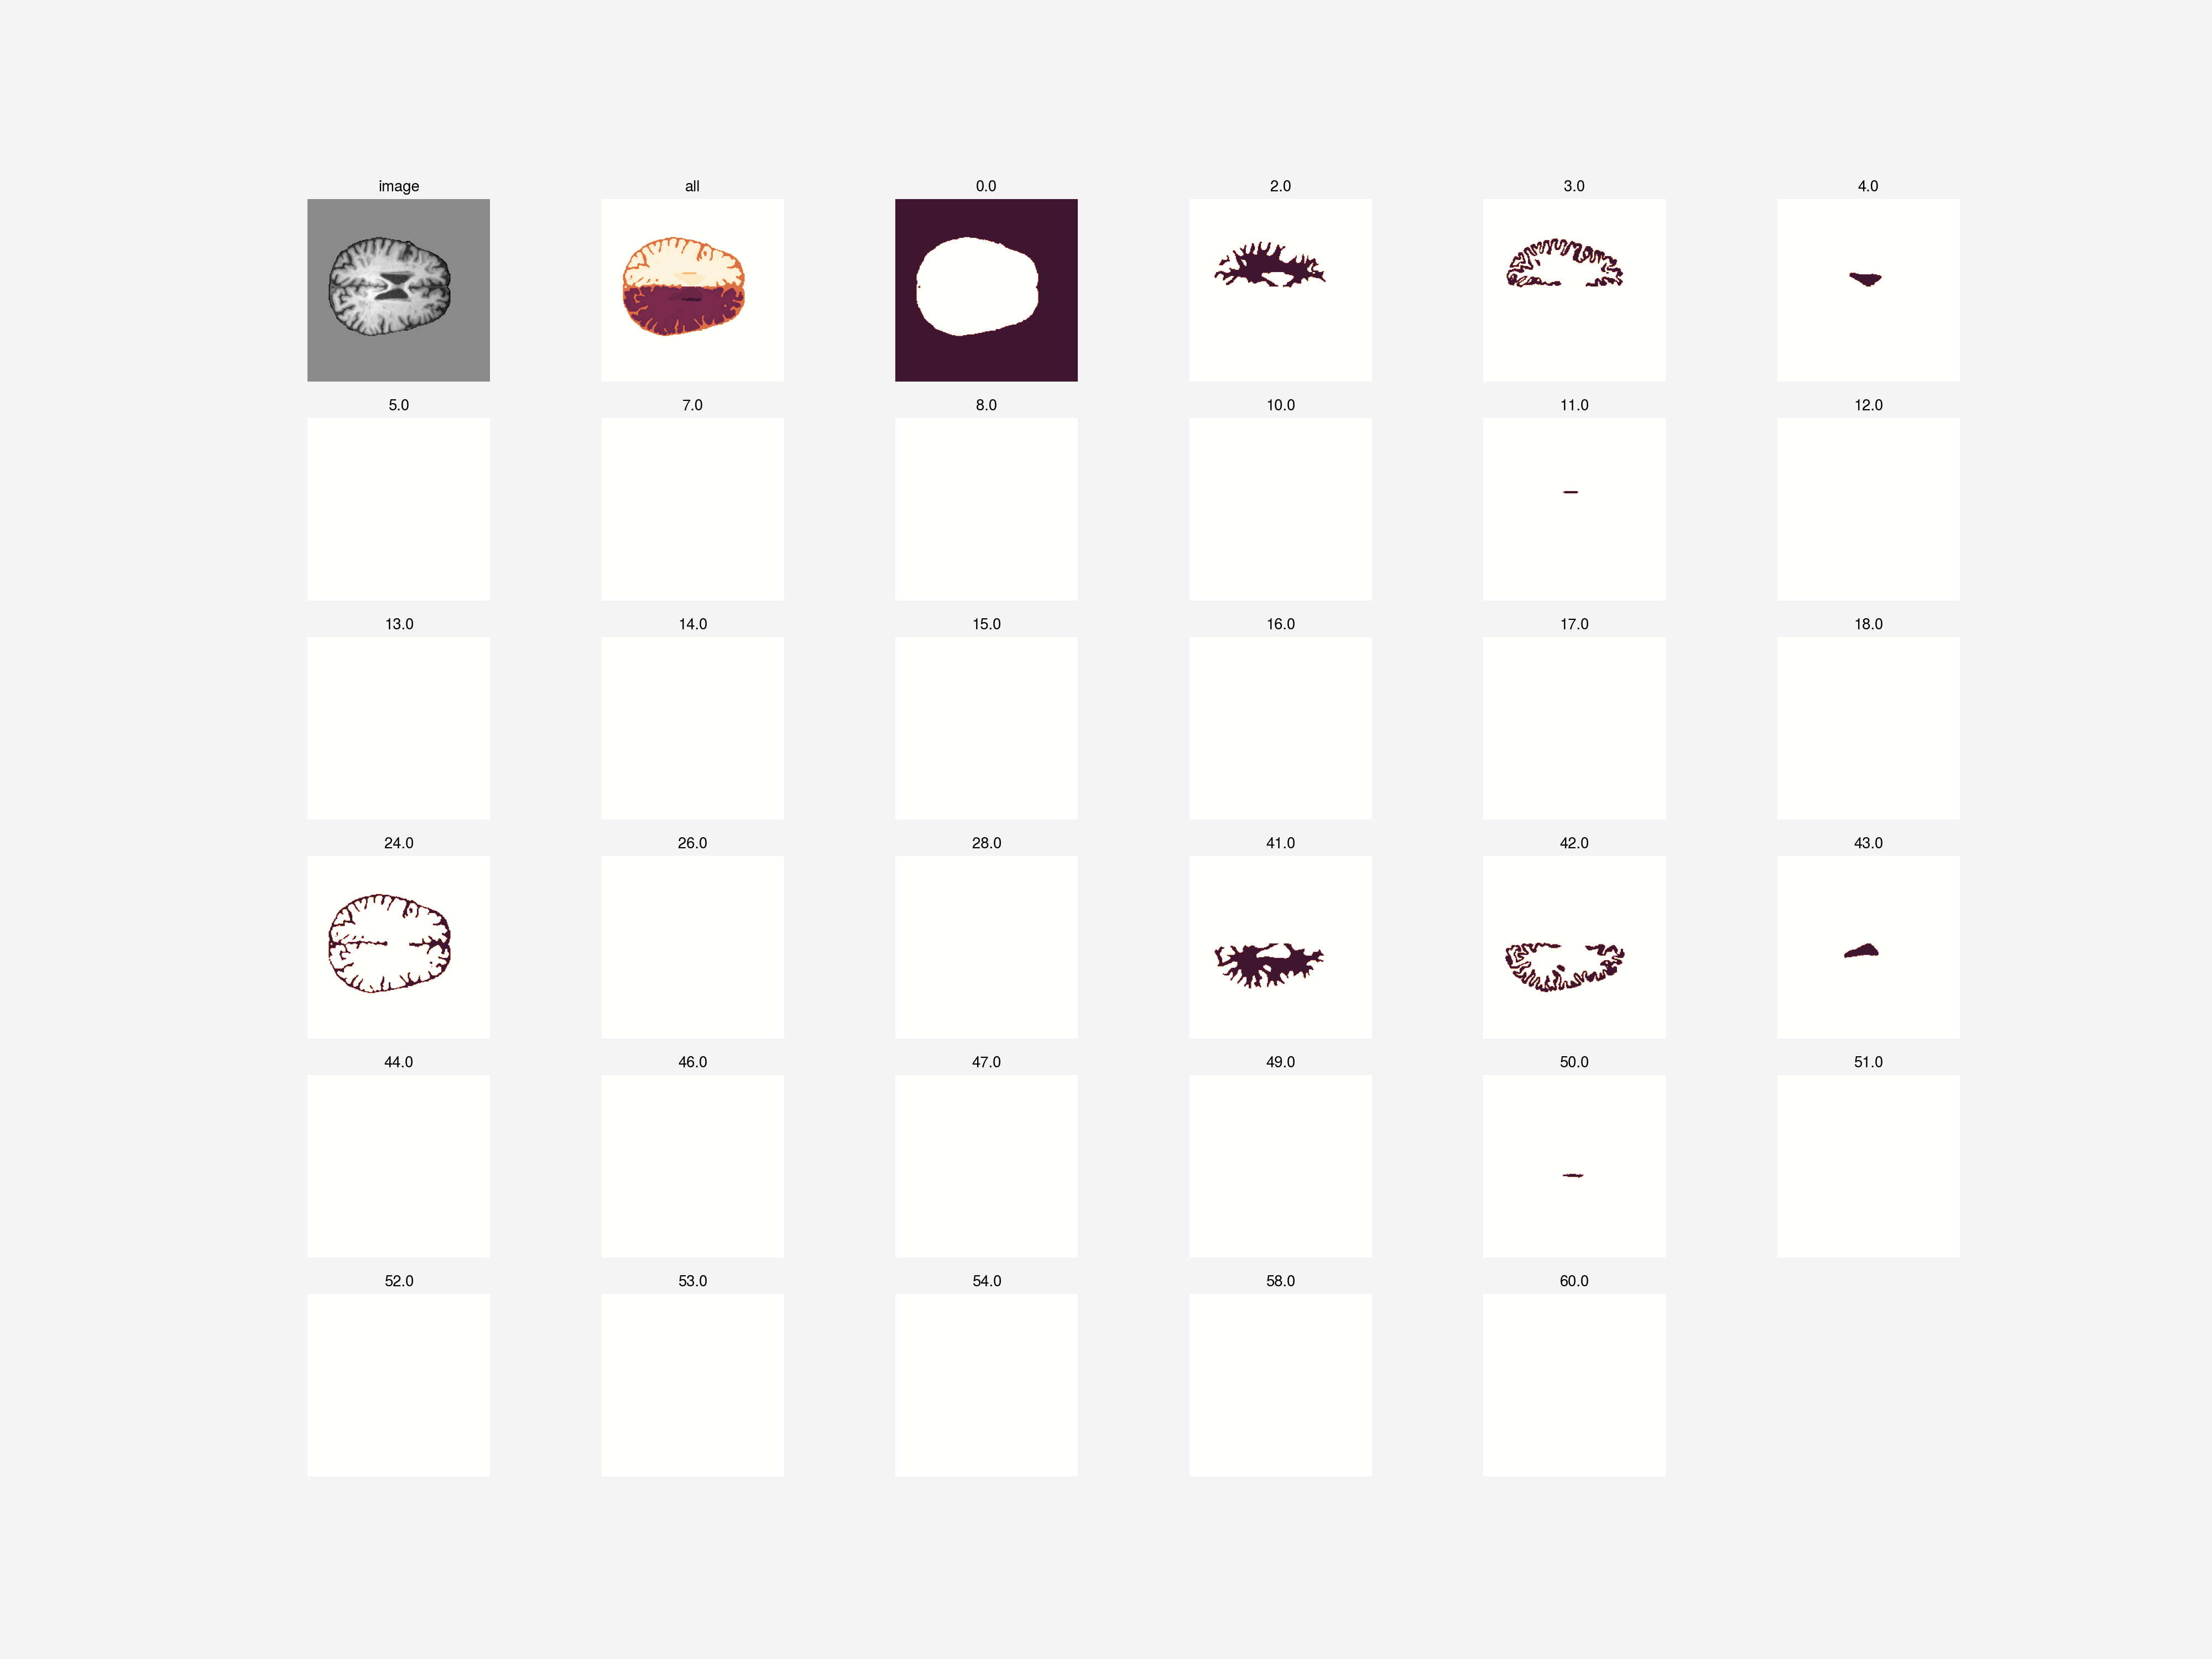

In [70]:
islice = 35
plt.figure(figsize=(20, 15))
plt.subplot(6, 6, 1)
plt.imshow(odata[:,:,islice], cmap='gray')
plt.axis('off')
plt.title("image")
plt.subplot(6, 6, 2)
plt.imshow(data[:,:,islice])
plt.axis('off')
plt.title("all")
for i, ccid in enumerate(data.unique()):
    plt.subplot(6,6,i+3)
    plt.imshow(data[:,:,islice]==ccid)
    plt.axis('off')
    plt.title(ccid.item())

In [71]:
img = torch.ones([*data.shape, 4])
img[:,:,:,1] = (data != 4)
img[:,:,:,2] = (data != 43)
img[:,:,:,3] = (data == 4) | (data == 43) # alpha channel

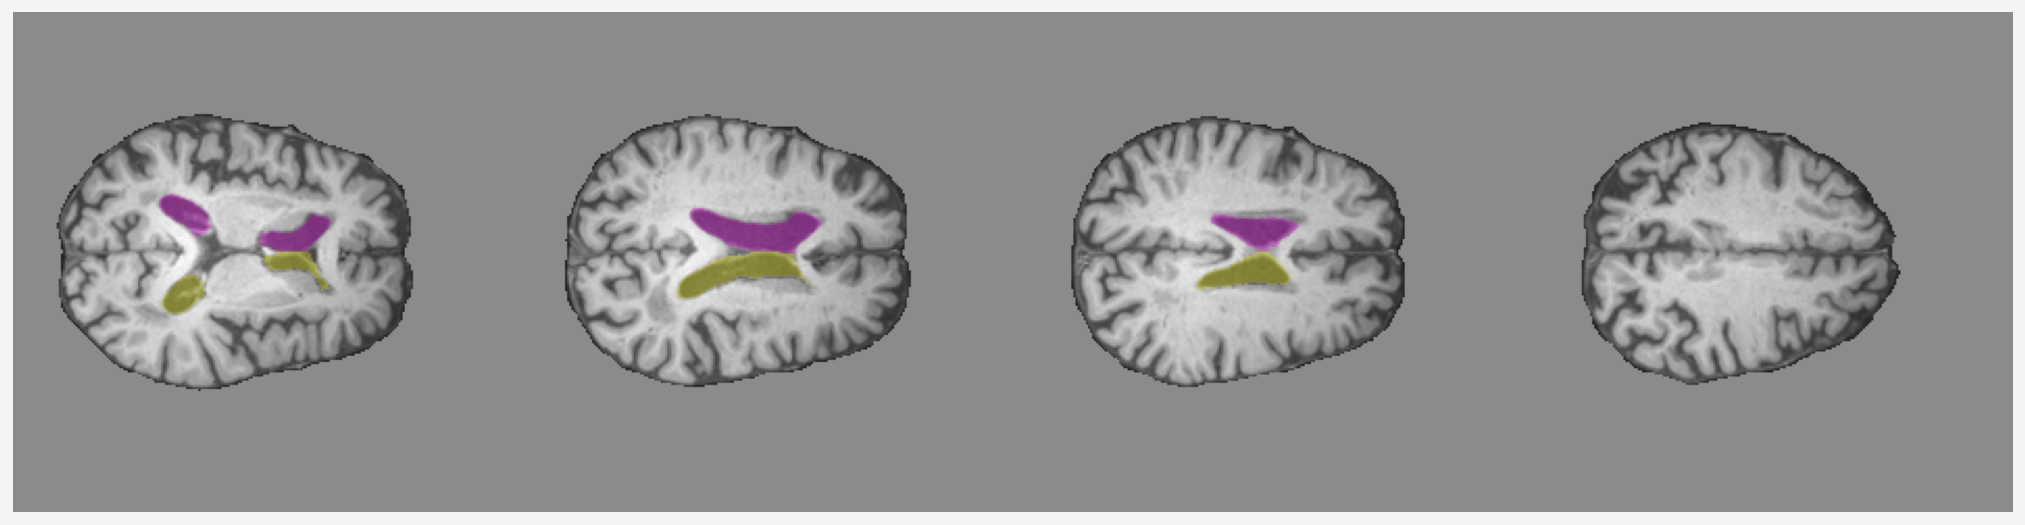

In [72]:
fig = pplt.figure(space=0, refwidth='20em')
axs = fig.subplots(nrows=1, ncols=4)

islice = 30
axs[0].imshow(odata[:,:,islice], cmap='gray', vmin=-3, vmax=2.5)
axs[0].imshow(img[:,:,islice], alpha=0.3)

islice = 33
axs[1].imshow(odata[:,:,islice], cmap='gray', vmin=-3, vmax=2.5)
axs[1].imshow(img[:,:,islice], alpha=0.3)

islice = 35
axs[2].imshow(odata[:,:,islice], cmap='gray', vmin=-3, vmax=2.5)
axs[2].imshow(img[:,:,islice], alpha=0.3)

islice = 38
axs[3].imshow(odata[:,:,islice], cmap='gray', vmin=-3, vmax=2.5)
axs[3].imshow(img[:,:,islice], alpha=0.3)

for ax in axs:
    ax.axis('off')
    for spine in ax.spines:
        ax.spines[spine].set_color('none')
        
# fig.save("synthseg - synthseg ventricle segmentation example.png")

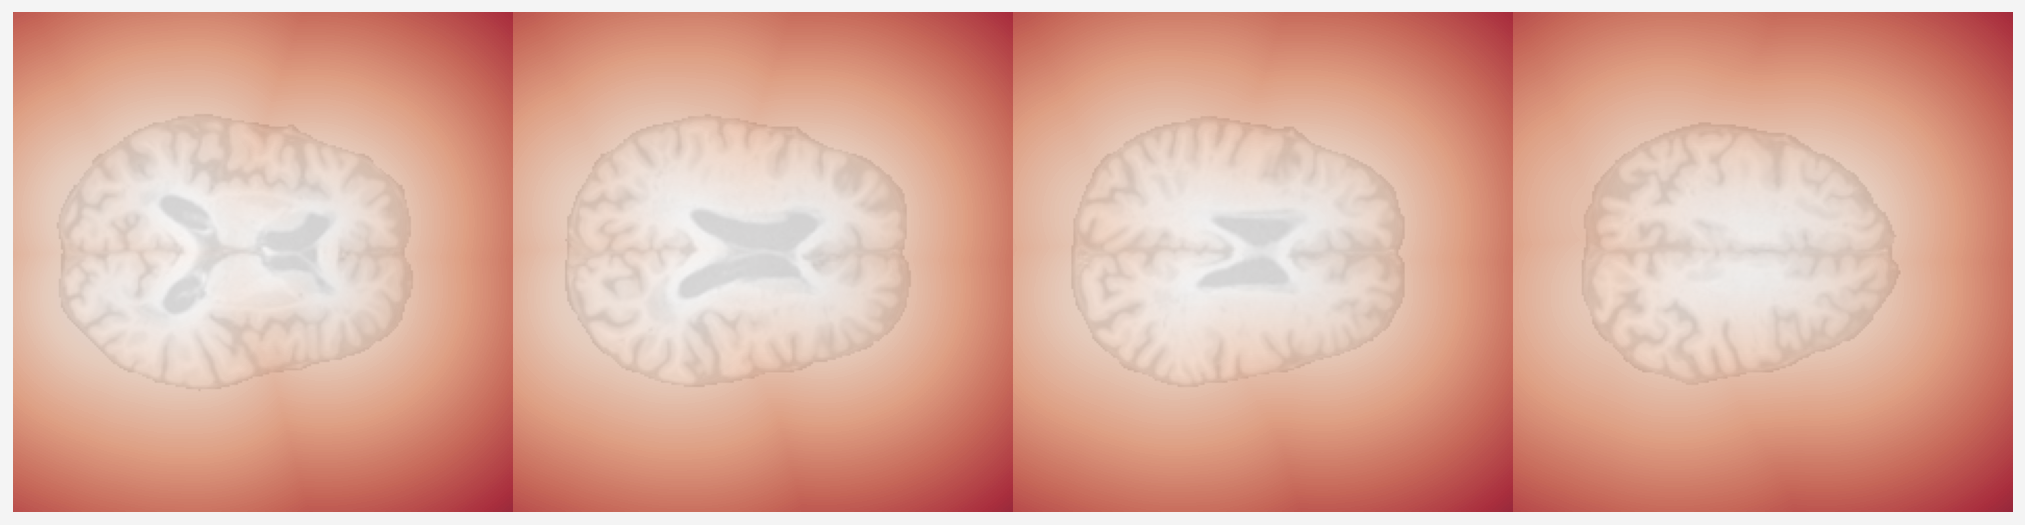

In [73]:
fig = pplt.figure(space=0, refwidth='20em')
axs = fig.subplots(nrows=1, ncols=4)

islice = 30
axs[0].imshow(odata[:,:,islice], cmap='gray', vmin=-3, vmax=2.5)
axs[0].imshow(distance_map[:,:,islice], alpha=0.8, vmin=distance_map.min(), vmax=distance_map.max())

islice = 33
axs[1].imshow(odata[:,:,islice], cmap='gray', vmin=-3, vmax=2.5)
axs[1].imshow(distance_map[:,:,islice], alpha=0.8, vmin=distance_map.min(), vmax=distance_map.max())

islice = 35
axs[2].imshow(odata[:,:,islice], cmap='gray', vmin=-3, vmax=2.5)
axs[2].imshow(distance_map[:,:,islice], alpha=0.8, vmin=distance_map.min(), vmax=distance_map.max())

islice = 38
axs[3].imshow(odata[:,:,islice], cmap='gray', vmin=-3, vmax=2.5)
axs[3].imshow(distance_map[:,:,islice], alpha=0.8, vmin=distance_map.min(), vmax=distance_map.max())

for ax in axs:
    ax.axis('off')
    for spine in ax.spines:
        ax.spines[spine].set_color('none')
        
# fig.save("synthseg - distance map from ventricle segmentation.png")

In [74]:
PV_region = distance_map < 10
PV_region_img = torch.ones([*PV_region.shape, 4])

PV_region_img[:,:,:,2] = 0.5 # create a pastel yellow
PV_region_img[:,:,:,3] = PV_region

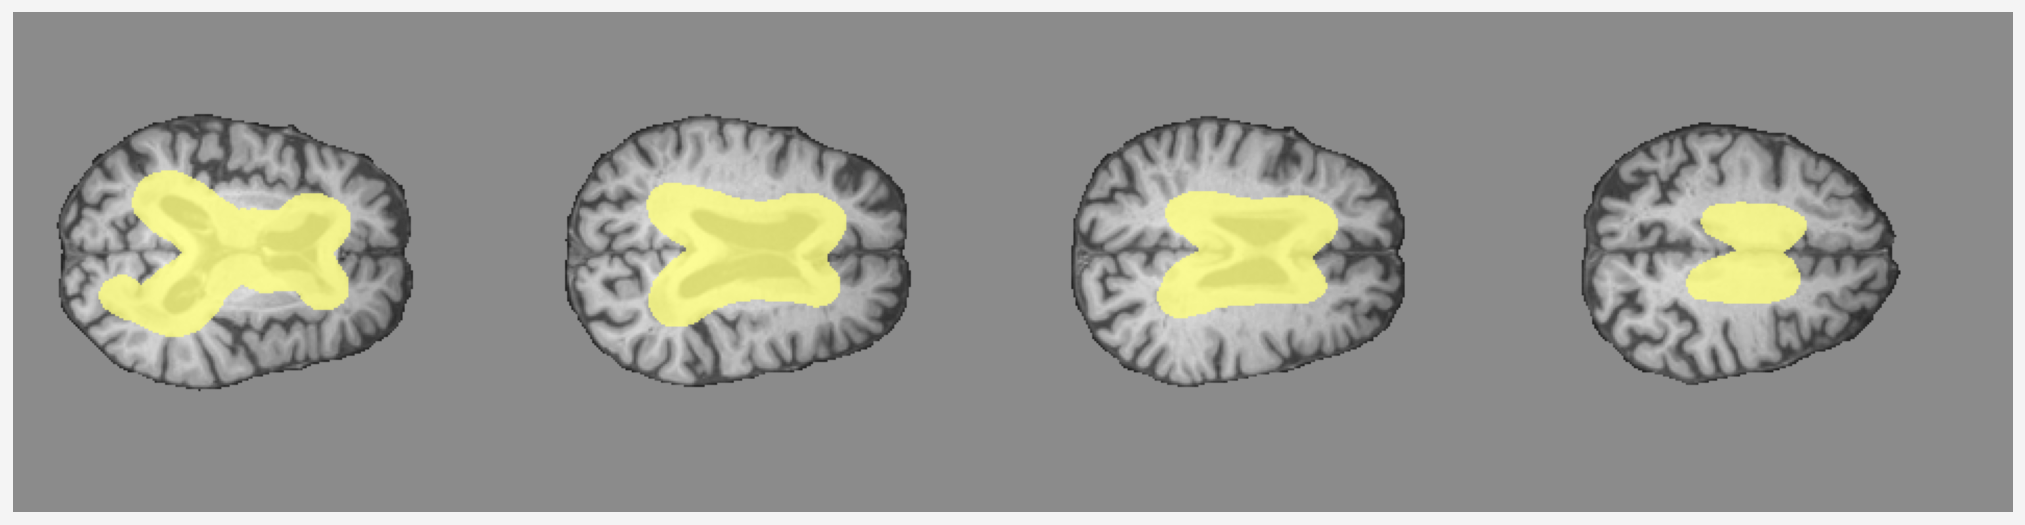

In [75]:
fig = pplt.figure(space=0, refwidth='20em')
axs = fig.subplots(nrows=1, ncols=4)

islice = 30
axs[0].imshow(odata[:,:,islice], cmap='gray', vmin=-3, vmax=2.5)
axs[0].imshow(PV_region_img[:,:,islice], alpha=0.8)

islice = 33
axs[1].imshow(odata[:,:,islice], cmap='gray', vmin=-3, vmax=2.5)
axs[1].imshow(PV_region_img[:,:,islice], alpha=0.8)

islice = 35
axs[2].imshow(odata[:,:,islice], cmap='gray', vmin=-3, vmax=2.5)
axs[2].imshow(PV_region_img[:,:,islice], alpha=0.8)

islice = 38
axs[3].imshow(odata[:,:,islice], cmap='gray', vmin=-3, vmax=2.5)
axs[3].imshow(PV_region_img[:,:,islice], alpha=0.8)

for ax in axs:
    ax.axis('off')
    for spine in ax.spines:
        ax.spines[spine].set_color('none')
        
# fig.save("synthseg - PV region as found in distance map.png")

In [59]:
PV_region.shape, odata.shape

(torch.Size([241, 240, 53]), (240, 240, 53))

In [76]:
from pathlib import Path

Path('test.nii.gz').touch()